# 個人課題のサンプルプログラム
- filepathで指定した画像ファイルを読み込み、その画像のRGB値の平均をNumpyのArrayで【行ベクトルで】返す関数　ext_mean_rgb(filepath)
- RGB値をnumpy array、qcolor=np.array([r,g,b])で与えられると[赤,橙,黄,緑,青,紫,ピンク,白,グレー,黒]の重みを成分とする10次元ベクトルが出力される関数gen_color_vec(qcolor)

## やること
- 「15分で理解する色彩と心理学の関係－色が人間の心に与える影響」(https://re-sta.jp/color-psychology-7787 )を読みながら印象を表す語と10色の関係を表す行列を作ってみよう
- 画像データをファイルパスで指定するとその画像データの色の印象から喚起される語が出力されるようなプログラムを作ってみよう



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from PIL import Image
import numpy as np
import os

# filepathで指定した画像ファイルを読み込み、その画像のRGB値の平均をNumpyのArrayで【行ベクトルで】返す関数　ext_mean_rgb(filepath)
def ext_mean_rgb(filepath):
  image = np.array(Image.open(filepath).convert('RGB')).reshape(-1,3)
  rgb_mean = np.array([np.mean(image[:,0]),np.mean(image[:,1]),np.mean(image[:,2])])
  return rgb_mean

In [ ]:
import numpy as np
from scipy.spatial import distance

# RGB値をnumpy array、qcolor=np.array([r,g,b])で与えられると[赤,橙,黄,緑,青,紫,ピンク,白,グレー,黒]の重みを成分とする10次元ベクトルが出力される関数gen_color_vec(qcolor)
def gen_color_vec(qcolor):
  colorvec=np.array([])
  palette=np.array(
      [
       [255,0,0], #赤
      [255,102,0],  #橙
      [255,255,0],  #黄
      [0,128,0],  #緑
      [0,0,255],  #青
      [128,0,128],  #紫
      [255,0,255],  #ピンク
      [255,255,255],  #白
      [128,128,128],  #グレー
      [0,0,0] #黒
      ])
  for col in palette:
    colorvec=np.append(colorvec,distance.euclidean(col,qcolor))
  colorvec=1-colorvec/np.linalg.norm(colorvec,np.inf)
  return colorvec

In [ ]:
import pandas as pd

#印象語と色のデータ
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataMathematicsI/color_image.csv', encoding='shift-jis')
df

,Unnamed: 0,情熱的,強い,派手,元気,楽しい,かわいい,危険,落ち着いた,健康的,穏やかな,冷静,冷たい,気高い,神秘的,甘やか,自由な,純粋な,孤独な,寂しい,かっこいい
0,red,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,orange,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,yellow,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,green,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
4,blue,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
5,purple,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0
6,pink,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,white,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0
8,gray,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
9,black,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,1


In [ ]:
#印象語をリストで取り出す
im = df.columns.values
im = np.delete(im, 0)
im

array(['情熱的', '強い', '派手', '元気', '楽しい', 'かわいい', '危険', '落ち着いた', '健康的',
       '穏やかな', '冷静', '冷たい', '気高い', '神秘的', '甘やか', '自由な', '純粋な', '孤独な',
       '寂しい', 'かっこいい'], dtype=object)

In [ ]:
#行列のみ取り出す
color_image = df.iloc[:, 1:].values
color_image

array([[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]])

In [ ]:
def result(x):
  #印象語行列と重みを掛け算
  image_weight = np.dot(color_image, x)
  #列ごとに足し算し1行ベクトルにする
  image_weight = np.sum(image_weight, axis = 0)
  #最大値のインデックスを取得
  max_im = np.where(image_weight == image_weight.max())

  #最大値のインデックスから印象語を抽出し出力
  for i in max_im:
    print(im[i])

In [ ]:
#使った画像と平均rgb値と印象語
filepath='/content/drive/My Drive/Colab Notebooks/DataMathematicsI/musubi.png'
rgb_mean = ext_mean_rgb(filepath)
x=gen_color_vec(rgb_mean)
print("[r, g, b]:", rgb_mean)
result(x)
Image.open(filepath)

[r, g, b]: [213.92167901 126.09918025 122.30226173]


ValueError: ignored

[r, g, b]: [121.50689358 133.99286757 129.58621948]
['冷静']


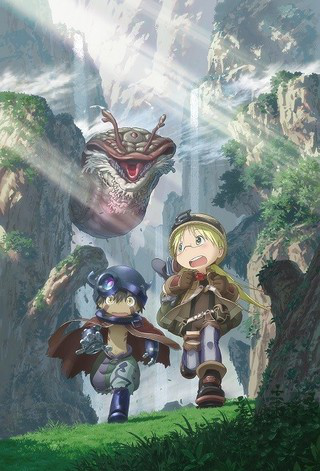

In [ ]:
#使った画像と平均rgb値と印象語
filepath='/content/drive/My Drive/Colab Notebooks/DataMathematicsI/madeinabis.jpg'
rgb_mean = ext_mean_rgb(filepath)
x=gen_color_vec(rgb_mean).reshape(-1,1)
print("[r, g, b]:", rgb_mean)
result(x)

Image.open(filepath)

<h1>↓最頻値で計算してみた</h1>

In [ ]:
def ext_mode_rgb(filepath):
  image = np.array(Image.open(filepath).convert('RGB')).reshape(-1,3)
  #rgb値が出てくる回数を記録し、その記録の最大値を持つrgb値を出力
  pixel_sum = []
  pixel_colors = []
  for col in image:
    col = col.tolist()
    if col in pixel_colors:
      pixel_sum[pixel_colors.index(col)] += 1
    else:
      pixel_colors.append(col)
      pixel_sum.append(1)

  rgb_mode = pixel_colors[pixel_sum.index(max(pixel_sum))]
  rgb_mode = np.array(rgb_mode) 

  return rgb_mode

[r, g, b]: [222  87  81]
['派手' '元気']


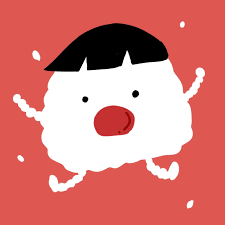

In [ ]:
filepath='/content/drive/My Drive/Colab Notebooks/DataMathematicsI/musubi.png'
rgb_mode = ext_mode_rgb(filepath)
x=gen_color_vec(rgb_mode).reshape(-1,1)
print("[r, g, b]:", rgb_mode)
result(x)
Image.open(filepath)

[r, g, b]: [245 245 243]
['落ち着いた']


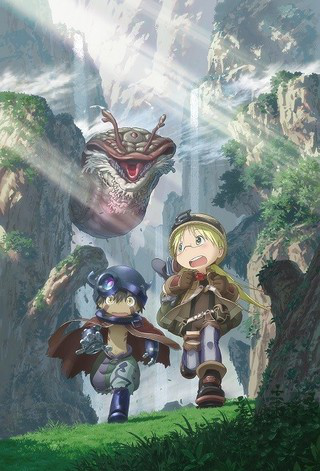

In [ ]:
filepath='/content/drive/My Drive/Colab Notebooks/DataMathematicsI/madeinabis.jpg'
rgb_mode = ext_mode_rgb(filepath)
x=gen_color_vec(rgb_mode).reshape(-1,1)
print("[r, g, b]:", rgb_mode)
result(x)
Image.open(filepath)

<h1>結果</h1>

<h3>物によってはちゃんと結果が変わりました（当たり前）</h3>
<p>どちらの計算方式の方が正しいのかはわからないけど、もっと形容詞のデータを作り込めばもっといいかんじになるのかもしれないと思いました。<p>